<img src="./pics/DL.png" width=110 align="left" style="margin-right: 10px">

# Introduction to Deep Learning

## 04. Dense Networks

---

## Extending Backpropagation

There are several ways to extend the backpropagation algorithm. We can change the activation function, the cost function, introduce regularization to the system or even use different optimization methods instead of the gradient descent. 

In this notebook we'll discover what are the most commonly used modifications.

### Activation functions

Changing the output function is one of the most direct way to change the network, and it is critical to match the function with the input data.

#### Sigmoid

<img src="./pics/functions/sigmoid.png" width=350 align="left">

$$\begin{align}
    \text{Range: } & \{0...1\} \\
    \sigma(x)      & = \frac{1}{1 + e^{-x}} \\
    \sigma'(x)     & = \sigma (x) \left( 1 - \sigma(x) \right)
\end{align}$$

<br><br><br><br>


#### Hyperbolic tangent

<img src="./pics/functions/tanh.png" width=350 align="left">

$$\begin{align}
    \text{Range: } & \{-1...1\} \\
    \tanh(x)       & = \frac{1 - e^{-2x}}{1 + e^{-2x}} \\
    \tanh'(x)      & = 1 - \frac{\left( e^x - e^{-x} \right) ^2}{ \left( e^x + e^{-x} \right)^2} \\
                   & = 1 - \tanh^2(x)
\end{align}$$

<br>


#### Linear

<img src="./pics/functions/linear.png" width=350 align="left">

$$\begin{align}
    \text{Range: } & \{-\inf...\inf\} \\
    f(x)           & = x \\
    f'(x)          & = 1
\end{align}$$

<br><br><br><br><br><br><br><br>


#### ReLU - Rectified Linear Unit

<img src="./pics/functions/relu.png" width=350 align="left">

$$\begin{align}
    \text{Range: }    & \{0...\inf\} \\
    \mathrm{relu}(x)  & = \max \left(0, x \right) \\
    \mathrm{relu}'(x) & = { \begin{cases} 
                                0 & {\text{for }} x < 0\\
                                1 & {\text{for }} x \leq 0
                            \end{cases} }
\end{align}$$

<br><br><br><br><br><br><br>


#### Leaky ReLU - Rectified Linear Unit

<img src="./pics/functions/leaky_relu.png" width=350 align="left">

A parametrized version of ReLU. Instead of setting the output to zero, multiply it with a very small number, tipical choice is $\alpha = 0.01$. 

$$\begin{align}
    \text{Range: }            & \{-\inf...\inf\} \\
    \mathrm{relu_{leaky}}(x)  & = \max \left(\alpha x, x \right) \\
    \mathrm{relu_{leaky}}'(x) & = { \begin{cases} 
                                        \alpha & {\text{for }} x < 0\\
                                        1      & {\text{for }} x \leq 0
                                    \end{cases} }
\end{align}$$

<br><br><br><br>


#### ELU - Exponential Linear Unit

<img src="./pics/functions/elu.png" width=350 align="left">

$$\begin{align}
    \text{Range: }   & \{-\inf...\inf\} \\
    \mathrm{elu}(x)  & = { \begin{cases} 
                               \alpha \left(e^{x} - 1\right) & {\text{for }} x < 0 \\
                               x                             & {\text{for }} x \leq 0
                           \end{cases} } \\
    \mathrm{elu}'(x) & = { \begin{cases} 
                                f(x) + \alpha & {\text{for }} x < 0 \\
                                1 & {\text{for }} x \leq 0
                            \end{cases} }
\end{align}$$

<br><br><br><br>


#### Softmax

Softmax activation function will turn output neuron activation values into probabilities. The sum of the outputs of the network will be always 1 and each output should have a nonzero value. The calculation can only be done knowing all of the neuron outputs.
Let's see how this change will be reflected in the derivatives.

$$\begin{align}
    \text{Range: } & \{0...1\} \\
    \sigma(x_i)    & = \frac{e^x_i}{\sum^n_{j=1}(e^x)} \\
    \sigma'(x_i)   & = \sigma(x_j)\left(\delta_{ij} - \sigma(x_i) \right) \\
    \text{where }  & \delta_{ij} = { \begin{cases} 
                                         0 & {\text{if }} i \neq j \\
                                         1 & {\text{for }} i = j
                                     \end{cases} }
\end{align}$$

### Cost functions

**Cost** or **loss** functions are the **same as** the **error** functions we used previously during our backpropagation. In reality, we can use the same quadratic error function as cost function in a deep network as well.  
The overall goal does not change: we would like to find the set of weights that minimizes the error on the output. However there are several better candidates for this purpose than the quadratic function.  
We'll add a small modification to our error computation on the neuron (which we refer as *delta*): 

$$\begin{align}
    \delta^n_k 
    & = \frac{\partial C^n}{\partial a^n_k}
    = \frac{\partial C^n}{\partial y^n_{j}} f'\left( a^n_j \right)
\end{align}$$

Instead of fixing the error on a special case, we'll leave the door open for any function, and compute the derivatives based on the loss function.  
Let's got through the most common cost functions with their advantages and use cases.

#### Regression

##### Mean Squared Error Loss

Regression problems requires direct measurement on the error. Notice that we measure multiple outcome and compute the average of the errors.

$$C = \frac{1}{m} \sum_k \left(t - y \right)^2 $$


##### Mean Squared Logarithmic Error Loss 

There are cases when the expected output of the regression has a large range range. Large values in the error causes large changes in the weights, so it is useful to measure the error on the logarithmic scale. Unscaled data is expected as input.

$$C = \frac{1}{m} \sum_k \left( \log(t + 1) - \log(y + 1) \right)^2 $$


##### Mean Absolute Error Loss

MAE is more robust to outliers, so if the target variable contains large values, it is appropriate to use this loss function. MAE can result in large gradient values which in turn leads to convergence problems.

$$C = \frac{1}{m} \sum_k \left| t - y \right|$$

#### Binary classification

##### Binary Cross-Entropy Loss

Target value range: $\{0, 1\}$  
Also referred as log loss.  
The average difference of the distribution of the target and prediction distribution in case of predicted **class = 1**. It is the preferred loss function when using maximum likelihood optimization (more on that later). Note that it should be used with sigmoid activation function.

$$C = - \frac{1}{m} \sum^m_i{\left[t\log(y_i) + (1 - t)\log(1 - y_i)\right]}$$

##### Hinge Loss

Target value range: $\{-1, 1\}$  
Created for SVM, punishes different incorrect sign. It is used for binary classification problem. Your result may vary, in some cases it has better performance than cross-entropy.

$$C = \sum^m_i{\max \left( 0, 1 - t \cdot y_i \right)}$$

##### Squared Hinge Loss

Target value range: $\{-1, 1\}$  
Hinge Loss ^2, smoothens the loss curve and finds the solution that maximizes the margin around the decision plane between the classes. It won't provide probabilistic information about the decision. It should be used in tandem with tanh activation.

$$C = \sum^m_i \left( \max \left( 0, 1 - t \cdot y_i \right)^2 \right)$$

##### Cosine similarity

Target value range: $\{-1, 1\}$  
It is used to measure similarity between vectors. Cosine similarity values have different meanings: -1 = total opposite, 0 = orthogonal, 1 = the same.

$$C = \frac{t \cdot y}{∥t∥ ∥y∥}$$


#### Multiclass classification

##### Multi-Class Cross-Entropy Loss

Target value range: $\{0, n\}$  
The average difference of the distribution of the target and prediction distribution **for every class**. Specifically for ML. Perfect score: entropy = 0. Requires $n$ output nodes (one for each class).

$$C = - \frac{1}{N} \sum^N_n{\left[t_n \log(y_n) + (1 - t_n)\log(1 - y_n) \right]}$$

##### Sparse Multiclass Cross-Entropy Loss

Target value range: $\{0, n\}$  
The same as Multi-Class Cross-Entropy Loss, but doesn't require the one-hot encoding of the target variable into $n$ distinct feature. It still requires $n$ output nodes and it is preferrably used with softmax activation function.

$$C = - \frac{1}{N} \sum^N_n{\left[t_n \log(y_n) + (1 - t_n)\log(1 - y_n) \right]}$$

##### Kullback Leibler Divergence Loss

Target value range: $\{0, n\}$  
aka relative entropy: difference from baseline distribution, how much info is lost if prediction used instead of target. Used for more sophisticated cases eg. approximating an another function. in multiclass case = Multi-Class Cross-Entropy Loss, so $n$ output node is required.

$$C = \sum^N_n {t_n \log \left({t_n}\Big/{y_n} \right)}$$

#### Recommendations

- Regression: MSE
- Binary classification: Cross Entropy
- Muliclass classification: Cross Entropy

### Regularization

> *With four parameters I can fit an elephant,  
> and with five I can make him wiggle his trunk.* - [Von Neumann](https://www.johndcook.com/blog/2011/06/21/how-to-fit-an-elephant/)

The more parameter a model has the more susceptible to overfitting. There are several way to prevent this: 
- We can split the data into train-test-validation datasets and measure error on validation sets, stop training once the error starts to increase on validation set and finally evaluate the model on the test set.
- We can decrease the size of the parameters and the size of the network with it, but larger networks has more expression and predictive power.
- It is also possible to handle overfitting by introducing a regularization punishment term to the cost function which will control the weight values.
- Other possible wy to reduce overfitting is to randomly select and temporarily drop neurons during each training batch.

Let's go through the effect of these methods one-by-one.

#### L1 

L_1 regularization uses the absolute value of the weights to prevent large changes in the weights except when it is an impactful. L_1 regularization will shrink the weights by a constant amount towards 0.

It can be described as: 

$$C = C_0 + \frac{\lambda}{m} \sum_w{|w|}$$

Where $C_0$ is the original cost function. In case of cross entropy we get: 

$$
C = -\frac{1}{m} \sum_{xi} 
    \left[ t_i \log a^L_i 
           + (1 - t_i) \log(1 - y^L_i) 
    \right]
    + \lambda \sum_i{|w_i|}
$$

#### L2

L_2 regularization uses the squared weights to prevent large changes in the weights except when it is an impactful. L_2 regularization will shrink the weights by the amount proportional to the value of the weights. It is also referred as weight decay as well.

$$C = C_0 + \frac{\lambda}{2m} \sum_w w^2$$

Where $C_0$ is the original cost function. In case of cross entropy we get: 

$$
C = -\frac{1}{m} \sum_{xi} 
    \left[ t_i \log a^L_i 
           + (1 - t_i) \log(1 - y^L_i) 
    \right]
    + \frac{\lambda}{2m} \sum_w w^2
$$

#### Dropout

<img src="https://cdn-images-1.medium.com/max/1600/1*iWQzxhVlvadk6VAJjsgXgg.png" width=500>By <a href="http://jmlr.org/papers/volume15/srivastava14a.old/srivastava14a.pdf">Srivastava, Nitish, et al. ”Dropout: a simple way to prevent neural networks from overfitting”, JMLR 2014</a>

Instead of transforming the cost function, dropout regularization (temporarily) modifies the network itself by removing some of the neurons from part of the training process (we'll discuss different training strategies in the next section).

### Optimizers (update rules)

#### Stochastic Gradient Descent

The algorithm we implemented in the previous chapter was actually the Stochastic Gradient descent. It is using one training example at a time to update the weights. Usually we shuffle the dataset instead of going through each sample one by one.  
Let's revisit the weight update rules with a small change: let's use a variation called mini-batch stochasitc gradient descent. Instead of handling one training sample at a time we are going to compute the result of $m$ sample at once and use the average error on those result to update the weights. Typical $m$ sizes are powers of 2, starting from $m = 2^6 = 64$.

- **feedforward**: 
    - set input to $y^{x,1}$
    - for every $l = 2, 3, ... L$: $y^{x,l} = w^l y^{x, l-1}$
- **backpropagation**:
    - output error: $\delta^{x,L} = \nabla_y C_x \odot \sigma'(a^{x,L})$
    - for every $l = L-1, L-2, ... 2$: $\delta^{x,l} = \left( \left( w^{l+1} \right)^T \delta^{x,l+1} \right) \cdot f'\left( a^{x, l - 1} \right)^T$
- **weight update**:
    - weights: $w^l = w^l - \frac{\alpha}{m} \sum_x {\delta^{x,l} \left(y^{x,l-1}\right)^T }$

#### Gradient Descent

Gradient descent is a special case of mini-batch stochastic gradient descent where $m$ equals to $N$, the number of training samples. It is very rarely used, since it requires computing every result for every iteration. 
It is possible to extend gradient descent with regularization techniques.

#### Gradient Descent with momentum

Finding the optimum is not always a straightforward process. The gradients aren't pointing to the global optimum directly, they are oscillating. To smoothen this oscillation, and give a better general direction, we are going to give an overall momentum to the direction of the change by incrementally building the speed of change. 
We are going to use mini-batch updates, and for each batch, we compute $\delta$ and create the speed of delta, called $V_\delta$ using the following formula:
$$V_\delta = \beta V_\delta + \left(1 - \beta\right)\delta$$
where $\beta$ is the friction parameter, and use this speed for the updates:
$$w = w - \alpha V_\delta$$
This change will smoothen the gradients. Typical value for $\beta$ is 0.9 which is basically the average of the last 10 gradient.

#### RMSprop - Root Mean Squared Propagation

The goal of the method is to further accelerate the learning process by modifying the update rule. Similarly to gradient descent with momentum method, we are trying to gather the general direction towards the optimum by conserving the momentum of the gradients from the previous iterations. This time however we will use the square of the gradients from each mini-batch:
$$S_\delta = \beta_2 S_\delta + \left(1 - \beta_2\right)\delta^2$$
where $\beta_2$ is similarly a hyperparameter, and we use this $S_\delta$ value to update our weights:
$$w = w - \alpha \frac{\delta}{\sqrt{S_\delta} + \epsilon}$$
where $\epsilon$ is a really small value to practically prevent division by zero.

#### ADAM - Adaptive Moment Estimation

Adam is basically the combination of momentum and RMSprop. The algorithm works by computing $V_\delta$ and $S_\delta$ in each mini-batch iteration:

$$\begin{align}
    V_\delta & = \beta_1 V_\delta + \left(1 - \beta_1\right)\delta  \\
    S_\delta & = \beta_2 S_\delta + \left(1 - \beta_2\right)\delta^2 \\
\end{align}$$

then a corrected value is generated:

$$\begin{align}
    V^{\textrm{corrected}}_\delta & = \frac{V_\delta}{1 - \beta_1^t}  \\
    S^{\textrm{corrected}}_\delta & = \frac{S_\delta}{1 - \beta_2^t} \\
\end{align}$$

where $t$ is the number of the current iteration, finally using the values above, our weight update rule is:

$$w = w - \alpha \frac{V^{\textrm{corrected}}_\delta}{\sqrt{S^{\textrm{corrected}}_\delta} + \epsilon}$$

This update rule has several hyperparameters to tune. The recommended setup by the designers of the algorithm is to fine tune $\alpha$, use $\beta_1 = 0.9$, $\beta_2 = 0.999$ and $\epsilon = 10^{-8}$.  
The name comes from the two types of momentum: $V_\delta$ is called the first momentum and $S_\delta$ is the second momentum.


#### +1: Learning rate decay

As the model approaches the optimum, it is desirable to slow down the speed of the weight change to actually reach the optimum instead of wandering around it.
It is a pretty straightforward, and there are many options:
$$\begin{align}
    \alpha & = \frac{1}{1 + \textrm{decay_rate} * \textrm{epoch_num}} \alpha_0 \\
    \alpha & = 0.95^\text{epoch_num} * \alpha_0 \\
    \alpha & = \frac{k}{\sqrt{\text{epoch_num}}} * \alpha_0 \\
    \alpha & = \frac{k}{\sqrt{\text{t}}} * \alpha_0
\end{align}$$

### Weight initialization

#### Vanishing and exploding gradients problem

If the initial weigths are larger than 1, the optimization process will incrementally raise it's value. This problem will result huge weight values which leads to problems with the convergence.  
The initial weights with smaller than 1 values will in turn always gets smaller by the optimization which will lead to really slow convergence.
The described problem is called vanishing and exploding gradients problem.

There is a third option however, setting the weights to zero. This, in turn will lead identical weight values over the entire network, basically degrading it's performance.

These problems were one of the main roadblock in front of deep learning, and there are several way to mitigate this problem. Let's see some of the ways to select good initial weights for the network.

#### Weight initialization method

The larger the number of inputs $n$ at layer $l$, the smaller the weights at that layer $w^{l}$ should be. It is a good practice to generate nonzero random initial values with variance of $\textrm{Var}(w^l) = \frac{1}{n}$. In case of ReLU activation function, the variance of $\frac{2}{n}$ yields better results. We can generate such weights by applying:
$$w^{l} = w^{l}_{\textrm{init}} * \sqrt{\frac{2}{n^{l-1}}}$$
where $l$ is the layer, $n$ is number of inputs and $w_\textrm{init}$ is randomly generated from the gaussian distribution (eg. using the `np.random.randn()` function). Using **$2$** in the variance and inside the fraction with ReLU activation function is the **He** initializer (named after the author of the paper), while using **$1$** in the variance, and in the fraction and using $\tanh$ activation function is called the **Xavier** intializer (again, after the author). There are many more variants available.


---

## In practice: Keras 

Everything we talked so far can be implemented by hand from scratch, or we can use one of the several available frameworks. There are several well established and widely used framework available, namely torch, theano, or tensorflow. There is a framework built on top of these low level frameworks, called `Keras` which we'll use to implement our networks.
Keras has two APIs:
- Sequential API: build the network by creating a list of layers.
- Functional API: define the network by chaining layer definitions using layers as input for the consecutive layers.

### Using Keras' `Sequential` API

In the Sequential API, we are going to define layers, and use those layers to build the final network. Many component can be a layer, layer of neurons, or even activation functions.
Once we defined the network layout, we'll compile the network by specifying the optimization method and the network itself, finally train it on training data.

#### [Sequential model](https://keras.io/guides/sequential_model/)

In order to create the network, we first have to create an empty model by initializing the Sequential model.

In [1]:
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
model = Sequential()
print(model.layers)

[]


#### [Dense layers](https://keras.io/api/layers/core_layers/dense/)

The fully connected layers we used so far are called dense layers in keras. We can define the network 1 layer at the time.  
For the initial layer we have to specify the input size, the number of neurons in the layer. For the following layers, the input size is automatically deducted based on the previous layers.

In [3]:
from keras.layers import Dense

In [4]:
hidden_layer_1 = Dense(2, input_dim=2)

In [5]:
model.add(hidden_layer_1)
print(model.layers)

Once we added at least one layer, we can also use the `.summary()` function to get more details about the model:

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


#### [Activation layers](https://keras.io/api/layers/core_layers/activation/)

Notice that we have not defined the activation function for our dense layer previously, so it'll use linear activation function. In order to modify that behaviour, we'll add an activation layer after the dense layer.
Using sigmoid activation layer, we can recreate our previously created network. 

In [7]:
from keras.layers import Activation

In [8]:
hidden_sigmoid_layer_1 = Activation('sigmoid')

In [9]:
model.add(hidden_sigmoid_layer_1)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________


We created the hidden layer with 2 neurons, let's add the final output layer with one (output) neuron.

In [10]:
output_layer = Dense(1)
output_sigmoid_layer = Activation('sigmoid')
model.add(output_layer)
model.add(output_sigmoid_layer)

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_1 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


#### [Optimizers](https://keras.io/api/optimizers/)

After we defined the layout of the network, we have to select and initialize the optimizer method.  
Let's use stochastic gradient descent just like we did previously without momentum.

In [12]:
from keras.optimizers import SGD

In [13]:
sgd = SGD(learning_rate=0.1, momentum=0.0)
print(sgd)

#### [Metrics](https://keras.io/api/metrics/) vs [Loss](https://keras.io/api/losses/)

The last part of the network is the selection of loss function and the evaluation metric. *Cost function* is the loss we'd like to minimize during training and *metric* is used to evaluate the trained model. We can set these during the *model compilation*.

#### Compilation

The last step in the network definition is the model compilation.  
It requires three parameters: an optimizer, a loss function, and a list of metrics.

In [14]:
model.compile(optimizer=sgd,
              loss='binary_crossentropy',
              metrics=['accuracy'])

#### Network Visualization

In [15]:
from keras.utils.vis_utils import plot_model

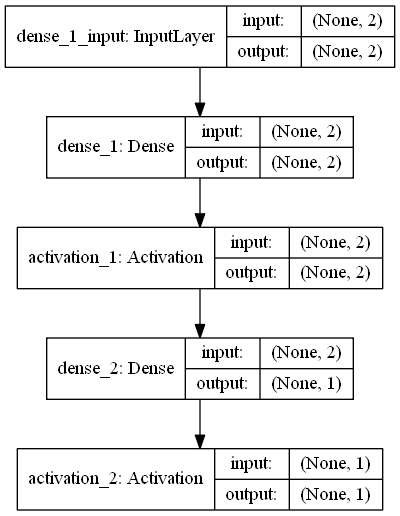

In [16]:
plot_model(model, show_shapes=True, show_layer_names=True)

#### [Regularization](https://keras.io/api/layers/regularizers/)

There are two types of regularization:

- weight regularization (eg. l2 normalization)
- dropout regularization

Weight regularization is available during layer definition, dropout regularization is available as a layer. Let's see an example for them.

In [17]:
from keras.regularizers import l1, l2
from keras.layers import Dropout

In [18]:
large_l2_regularizer = l2(5.0)
small_l1_regularizer = l1(0.001)

# hidden layer 
regularized_hidden_layer = Dense(2, input_dim=2, 
                                 kernel_regularizer=large_l2_regularizer, 
                                 bias_regularizer=small_l1_regularizer)

# dropout
hidden_dropout_layer = Dropout(rate=0.5)  # 50% of the neurons

# output layer
regularized_output_layer = Dense(1, kernel_regularizer=large_l2_regularizer)

In [19]:
regularized_model = Sequential()

regularized_model.add(regularized_hidden_layer)
regularized_model.add(Activation('sigmoid'))
regularized_model.add(hidden_dropout_layer)
regularized_model.add(regularized_output_layer)
regularized_model.add(Activation('sigmoid'))

regularized_model.compile(optimizer=SGD(),
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

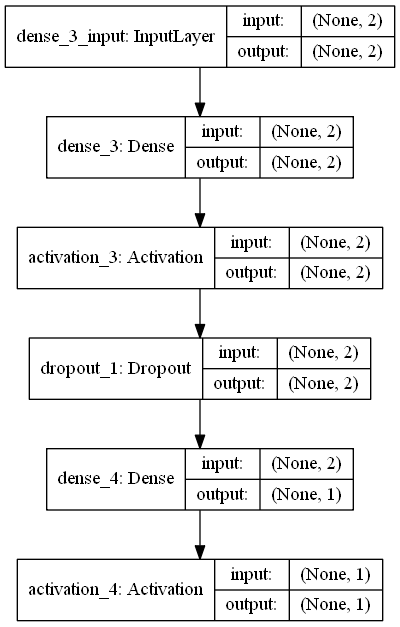

In [20]:
plot_model(regularized_model, show_shapes=True, show_layer_names=True)

---

## Example

### XOR revisited

For the last time, I promise. :)  
Let's check train the compiled keras models on this problem.

A | B | output |
--|---|--------|
0 | 0 |  0     |
0 | 1 |  1     |
1 | 0 |  1     |
1 | 1 |  0     |

In [21]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from helpers import plot_results_with_hyperplane, FILL_IN

np.random.seed(42)

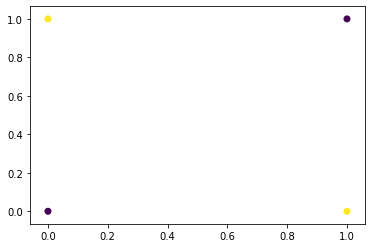

In [22]:
inputs = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
labels = np.array([0, 1, 1, 0])

plt.scatter(x=inputs[:, 0], y=inputs[:, 1], c=labels)

#### Training

The final step is the training - it is really similar to training any sklearn model.

In [23]:
model.fit(inputs, labels, batch_size=1, epochs=2000)

Epoch 1/2000
4/4 [==============================] - 0s 18ms/step - loss: 0.7914 - accuracy: 0.5000
Epoch 2/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7713 - accuracy: 0.5000
Epoch 3/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7558 - accuracy: 0.5000
Epoch 4/2000
4/4 [==============================] - 0s 750us/step - loss: 0.7458 - accuracy: 0.5000
Epoch 5/2000
4/4 [==============================] - 0s 748us/step - loss: 0.7383 - accuracy: 0.5000
Epoch 6/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7318 - accuracy: 0.5000
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7270 - accuracy: 0.5000
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7235 - accuracy: 0.5000
Epoch 9/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7209 - accuracy: 0.5000
Epoch 10/2000
4/4 [==============================] - 0s 999us/step - loss: 0.7179 - accuracy: 0.5000
Epoch 11/200

4/4 [==============================] - 0s 991us/step - loss: 0.7091 - accuracy: 0.2500
Epoch 84/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7097 - accuracy: 0.7500
Epoch 85/2000
4/4 [==============================] - 0s 997us/step - loss: 0.7096 - accuracy: 0.5000
Epoch 86/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7096 - accuracy: 0.2500
Epoch 87/2000
4/4 [==============================] - 0s 994us/step - loss: 0.7089 - accuracy: 0.2500
Epoch 88/2000
4/4 [==============================] - 0s 997us/step - loss: 0.7095 - accuracy: 0.7500
Epoch 89/2000
4/4 [==============================] - 0s 997us/step - loss: 0.7094 - accuracy: 0.5000
Epoch 90/2000
4/4 [==============================] - 0s 996us/step - loss: 0.7087 - accuracy: 0.2500
Epoch 91/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7086 - accuracy: 0.5000
Epoch 92/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7092 - accuracy: 0.5000
Epoch 93/200

4/4 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.7500
Epoch 165/2000
4/4 [==============================] - 0s 997us/step - loss: 0.7056 - accuracy: 0.2500
Epoch 166/2000
4/4 [==============================] - 0s 998us/step - loss: 0.7056 - accuracy: 0.5000
Epoch 167/2000
4/4 [==============================] - 0s 748us/step - loss: 0.7055 - accuracy: 0.5000
Epoch 168/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7055 - accuracy: 0.5000
Epoch 169/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7048 - accuracy: 0.2500
Epoch 170/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.5000
Epoch 171/2000
4/4 [==============================] - 0s 997us/step - loss: 0.7053 - accuracy: 0.2500
Epoch 172/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7047 - accuracy: 0.2500
Epoch 173/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7052 - accuracy: 0.5000
Epoch 1

4/4 [==============================] - 0s 997us/step - loss: 0.6999 - accuracy: 0.5000
Epoch 245/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.6992 - accuracy: 0.7500
Epoch 246/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6996 - accuracy: 0.5000
Epoch 247/2000
4/4 [==============================] - 0s 997us/step - loss: 0.6995 - accuracy: 0.5000
Epoch 248/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6994 - accuracy: 0.5000
Epoch 249/2000
4/4 [==============================] - 0s 989us/step - loss: 0.6993 - accuracy: 0.5000
Epoch 250/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.5000
Epoch 251/2000
4/4 [==============================] - 0s 995us/step - loss: 0.6991 - accuracy: 0.5000
Epoch 252/2000
4/4 [==============================] - 0s 997us/step - loss: 0.6990 - accuracy: 0.5000
Epoch 253/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6983 - accuracy: 0.5000
Epoch

4/4 [==============================] - 0s 1ms/step - loss: 0.6877 - accuracy: 0.5000
Epoch 325/2000
4/4 [==============================] - 0s 748us/step - loss: 0.6881 - accuracy: 0.5000
Epoch 326/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6879 - accuracy: 0.5000
Epoch 327/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5000
Epoch 328/2000
4/4 [==============================] - 0s 998us/step - loss: 0.6875 - accuracy: 0.7500
Epoch 329/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6872 - accuracy: 0.5000
Epoch 330/2000
4/4 [==============================] - 0s 997us/step - loss: 0.6871 - accuracy: 0.5000
Epoch 331/2000
4/4 [==============================] - 0s 997us/step - loss: 0.6869 - accuracy: 0.5000
Epoch 332/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6866 - accuracy: 0.7500
Epoch 333/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.7500
Epoch 3

4/4 [==============================] - 0s 740us/step - loss: 0.6652 - accuracy: 0.5000
Epoch 406/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6652 - accuracy: 0.5000
Epoch 407/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6643 - accuracy: 0.5000
Epoch 408/2000
4/4 [==============================] - 0s 998us/step - loss: 0.6644 - accuracy: 0.5000
Epoch 409/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6641 - accuracy: 0.5000
Epoch 410/2000
4/4 [==============================] - 0s 748us/step - loss: 0.6633 - accuracy: 0.7500
Epoch 411/2000
4/4 [==============================] - 0s 989us/step - loss: 0.6633 - accuracy: 0.7500
Epoch 412/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6629 - accuracy: 0.7500
Epoch 413/2000
4/4 [==============================] - 0s 994us/step - loss: 0.6626 - accuracy: 0.5000
Epoch 414/2000
4/4 [==============================] - 0s 754us/step - loss: 0.6618 - accuracy: 0.7500
Epo

4/4 [==============================] - 0s 998us/step - loss: 0.6315 - accuracy: 0.7500
Epoch 486/2000
4/4 [==============================] - 0s 748us/step - loss: 0.6308 - accuracy: 0.7500
Epoch 487/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6303 - accuracy: 0.7500
Epoch 488/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6301 - accuracy: 0.7500
Epoch 489/2000
4/4 [==============================] - 0s 998us/step - loss: 0.6293 - accuracy: 0.7500
Epoch 490/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6292 - accuracy: 0.7500
Epoch 491/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6285 - accuracy: 0.7500
Epoch 492/2000
4/4 [==============================] - 0s 739us/step - loss: 0.6283 - accuracy: 0.7500
Epoch 493/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6275 - accuracy: 0.7500
Epoch 494/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.6270 - accuracy: 0.7500
Epoch 4

4/4 [==============================] - 0s 1ms/step - loss: 0.5946 - accuracy: 0.7500
Epoch 567/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5942 - accuracy: 0.7500
Epoch 568/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5937 - accuracy: 0.7500
Epoch 569/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5933 - accuracy: 0.7500
Epoch 570/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5930 - accuracy: 0.7500
Epoch 571/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5925 - accuracy: 0.7500
Epoch 572/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5920 - accuracy: 0.7500
Epoch 573/2000
4/4 [==============================] - 0s 991us/step - loss: 0.5916 - accuracy: 0.7500
Epoch 574/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5908 - accuracy: 0.7500
Epoch 575/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5908 - accuracy: 0.7500
Epoch

4/4 [==============================] - 0s 997us/step - loss: 0.5609 - accuracy: 0.7500
Epoch 647/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5602 - accuracy: 0.7500
Epoch 648/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5600 - accuracy: 0.7500
Epoch 649/2000
4/4 [==============================] - 0s 748us/step - loss: 0.5596 - accuracy: 0.7500
Epoch 650/2000
4/4 [==============================] - 0s 998us/step - loss: 0.5591 - accuracy: 0.7500
Epoch 651/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5587 - accuracy: 0.7500
Epoch 652/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5582 - accuracy: 0.7500
Epoch 653/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5575 - accuracy: 0.7500
Epoch 654/2000
4/4 [==============================] - 0s 998us/step - loss: 0.5571 - accuracy: 0.7500
Epoch 655/2000
4/4 [==============================] - 0s 998us/step - loss: 0.5566 - accuracy: 0.

4/4 [==============================] - 0s 750us/step - loss: 0.5150 - accuracy: 0.7500
Epoch 728/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7500
Epoch 729/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5133 - accuracy: 0.7500
Epoch 730/2000
4/4 [==============================] - 0s 993us/step - loss: 0.5125 - accuracy: 0.7500
Epoch 731/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5116 - accuracy: 0.7500
Epoch 732/2000
4/4 [==============================] - 0s 997us/step - loss: 0.5107 - accuracy: 0.7500
Epoch 733/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5099 - accuracy: 0.7500
Epoch 734/2000
4/4 [==============================] - 0s 740us/step - loss: 0.5094 - accuracy: 0.7500
Epoch 735/2000
4/4 [==============================] - 0s 753us/step - loss: 0.5082 - accuracy: 0.7500
Epoch 736/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.5075 - accuracy: 0.7500
Epo

4/4 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.7500
Epoch 808/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.4195 - accuracy: 0.7500
Epoch 809/2000
4/4 [==============================] - 0s 997us/step - loss: 0.4179 - accuracy: 0.7500
Epoch 810/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.7500
Epoch 811/2000
4/4 [==============================] - 0s 987us/step - loss: 0.4145 - accuracy: 1.0000
Epoch 812/2000
4/4 [==============================] - 0s 999us/step - loss: 0.4129 - accuracy: 0.7500
Epoch 813/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.4114 - accuracy: 1.0000
Epoch 814/2000
4/4 [==============================] - 0s 989us/step - loss: 0.4099 - accuracy: 1.0000
Epoch 815/2000
4/4 [==============================] - 0s 989us/step - loss: 0.4080 - accuracy: 0.7500
Epoch 816/2000
4/4 [==============================] - 0s 997us/step - loss: 0.4066 - accuracy: 1.0000
Epo

4/4 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 1.0000
Epoch 888/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2822 - accuracy: 1.0000
Epoch 889/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2806 - accuracy: 1.0000
Epoch 890/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.2790 - accuracy: 1.0000
Epoch 891/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2773 - accuracy: 1.0000
Epoch 892/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2759 - accuracy: 1.0000
Epoch 893/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2743 - accuracy: 1.0000
Epoch 894/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2728 - accuracy: 1.0000
Epoch 895/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.2711 - accuracy: 1.0000
Epoch 896/2000
4/4 [==============================] - 0s 998us/step - loss: 0.2696 - accuracy: 1.0000
Epoch 897/200

4/4 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 1.0000
Epoch 969/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 1.0000
Epoch 970/2000
4/4 [==============================] - 0s 997us/step - loss: 0.1796 - accuracy: 1.0000
Epoch 971/2000
4/4 [==============================] - 0s 997us/step - loss: 0.1787 - accuracy: 1.0000
Epoch 972/2000
4/4 [==============================] - 0s 985us/step - loss: 0.1778 - accuracy: 1.0000
Epoch 973/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1769 - accuracy: 1.0000
Epoch 974/2000
4/4 [==============================] - 0s 897us/step - loss: 0.1760 - accuracy: 1.0000
Epoch 975/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1751 - accuracy: 1.0000
Epoch 976/2000
4/4 [==============================] - 0s 999us/step - loss: 0.1742 - accuracy: 1.0000
Epoch 977/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1733 - accuracy: 1.0000
Epoch

4/4 [==============================] - 0s 998us/step - loss: 0.1257 - accuracy: 1.0000
Epoch 1049/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1252 - accuracy: 1.0000
Epoch 1050/2000
4/4 [==============================] - 0s 991us/step - loss: 0.1247 - accuracy: 1.0000
Epoch 1051/2000
4/4 [==============================] - 0s 995us/step - loss: 0.1242 - accuracy: 1.0000
Epoch 1052/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1237 - accuracy: 1.0000
Epoch 1053/2000
4/4 [==============================] - 0s 997us/step - loss: 0.1232 - accuracy: 1.0000
Epoch 1054/2000
4/4 [==============================] - 0s 997us/step - loss: 0.1228 - accuracy: 1.0000
Epoch 1055/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.1223 - accuracy: 1.0000
Epoch 1056/2000
4/4 [==============================] - 0s 997us/step - loss: 0.1218 - accuracy: 1.0000
Epoch 1057/2000
4/4 [==============================] - 0s 1000us/step - loss: 0.1213 - accuracy

4/4 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 1.0000
Epoch 1129/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0937 - accuracy: 1.0000
Epoch 1130/2000
4/4 [==============================] - 0s 748us/step - loss: 0.0934 - accuracy: 1.0000
Epoch 1131/2000
4/4 [==============================] - 0s 988us/step - loss: 0.0931 - accuracy: 1.0000
Epoch 1132/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0928 - accuracy: 1.0000
Epoch 1133/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0925 - accuracy: 1.0000
Epoch 1134/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 1.0000
Epoch 1135/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0920 - accuracy: 1.0000
Epoch 1136/2000
4/4 [==============================] - 0s 991us/step - loss: 0.0917 - accuracy: 1.0000
Epoch 1137/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0914 - accuracy: 1.0000


4/4 [==============================] - 0s 1ms/step - loss: 0.0743 - accuracy: 1.0000
Epoch 1209/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0741 - accuracy: 1.0000
Epoch 1210/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 1.0000
Epoch 1211/2000
4/4 [==============================] - 0s 749us/step - loss: 0.0737 - accuracy: 1.0000
Epoch 1212/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 1.0000
Epoch 1213/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0734 - accuracy: 1.0000
Epoch 1214/2000
4/4 [==============================] - 0s 989us/step - loss: 0.0732 - accuracy: 1.0000
Epoch 1215/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 1.0000
Epoch 1216/2000
4/4 [==============================] - 0s 997us/step - loss: 0.0728 - accuracy: 1.0000
Epoch 1217/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0726 - accuracy: 1.000

4/4 [==============================] - 0s 997us/step - loss: 0.0611 - accuracy: 1.0000
Epoch 1289/2000
4/4 [==============================] - 0s 997us/step - loss: 0.0610 - accuracy: 1.0000
Epoch 1290/2000
4/4 [==============================] - 0s 990us/step - loss: 0.0608 - accuracy: 1.0000
Epoch 1291/2000
4/4 [==============================] - 0s 730us/step - loss: 0.0607 - accuracy: 1.0000
Epoch 1292/2000
4/4 [==============================] - 0s 999us/step - loss: 0.0606 - accuracy: 1.0000
Epoch 1293/2000
4/4 [==============================] - ETA: 0s - loss: 0.0715 - accuracy: 1.00 - 0s 997us/step - loss: 0.0604 - accuracy: 1.0000
Epoch 1294/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0603 - accuracy: 1.0000
Epoch 1295/2000
4/4 [==============================] - 0s 996us/step - loss: 0.0602 - accuracy: 1.0000
Epoch 1296/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0600 - accuracy: 1.0000
Epoch 1297/2000
4/4 [============================

4/4 [==============================] - 0s 1ms/step - loss: 0.0518 - accuracy: 1.0000
Epoch 1368/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0517 - accuracy: 1.0000
Epoch 1369/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0516 - accuracy: 1.0000
Epoch 1370/2000
4/4 [==============================] - 0s 997us/step - loss: 0.0515 - accuracy: 1.0000
Epoch 1371/2000
4/4 [==============================] - 0s 990us/step - loss: 0.0514 - accuracy: 1.0000
Epoch 1372/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0513 - accuracy: 1.0000
Epoch 1373/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0512 - accuracy: 1.0000
Epoch 1374/2000
4/4 [==============================] - 0s 989us/step - loss: 0.0511 - accuracy: 1.0000
Epoch 1375/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 1.0000
Epoch 1376/2000
4/4 [==============================] - 0s 993us/step - loss: 0.0509 - accuracy: 1.0

4/4 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 1.0000
Epoch 1447/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0448 - accuracy: 1.0000
Epoch 1448/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0447 - accuracy: 1.0000
Epoch 1449/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0446 - accuracy: 1.0000
Epoch 1450/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 1451/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0445 - accuracy: 1.0000
Epoch 1452/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0444 - accuracy: 1.0000
Epoch 1453/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 1.0000
Epoch 1454/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 1.0000
Epoch 1455/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0442 - accuracy: 1.0000
Epoch 

4/4 [==============================] - 0s 1ms/step - loss: 0.0394 - accuracy: 1.0000
Epoch 1527/2000
4/4 [==============================] - 0s 742us/step - loss: 0.0393 - accuracy: 1.0000
Epoch 1528/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0393 - accuracy: 1.0000
Epoch 1529/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0392 - accuracy: 1.0000
Epoch 1530/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0392 - accuracy: 1.0000
Epoch 1531/2000
4/4 [==============================] - 0s 742us/step - loss: 0.0391 - accuracy: 1.0000
Epoch 1532/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0391 - accuracy: 1.0000
Epoch 1533/2000
4/4 [==============================] - 0s 742us/step - loss: 0.0390 - accuracy: 1.0000
Epoch 1534/2000
4/4 [==============================] - 0s 743us/step - loss: 0.0389 - accuracy: 1.0000
Epoch 1535/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0389 - accuracy: 1.0

4/4 [==============================] - 0s 1ms/step - loss: 0.0351 - accuracy: 1.0000
Epoch 1607/2000
4/4 [==============================] - 0s 986us/step - loss: 0.0351 - accuracy: 1.0000
Epoch 1608/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 1609/2000
4/4 [==============================] - 0s 989us/step - loss: 0.0350 - accuracy: 1.0000
Epoch 1610/2000
4/4 [==============================] - 0s 994us/step - loss: 0.0349 - accuracy: 1.0000
Epoch 1611/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0349 - accuracy: 1.0000
Epoch 1612/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0348 - accuracy: 1.0000
Epoch 1613/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0348 - accuracy: 1.0000
Epoch 1614/2000
4/4 [==============================] - 0s 694us/step - loss: 0.0347 - accuracy: 1.0000
Epoch 1615/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0347 - accuracy: 1

4/4 [==============================] - 0s 1ms/step - loss: 0.0316 - accuracy: 1.0000
Epoch 1687/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0316 - accuracy: 1.0000
Epoch 1688/2000
4/4 [==============================] - 0s 739us/step - loss: 0.0316 - accuracy: 1.0000
Epoch 1689/2000
4/4 [==============================] - 0s 988us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 1690/2000
4/4 [==============================] - 0s 992us/step - loss: 0.0315 - accuracy: 1.0000
Epoch 1691/2000
4/4 [==============================] - 0s 994us/step - loss: 0.0314 - accuracy: 1.0000
Epoch 1692/2000
4/4 [==============================] - 0s 748us/step - loss: 0.0314 - accuracy: 1.0000
Epoch 1693/2000
4/4 [==============================] - 0s 997us/step - loss: 0.0314 - accuracy: 1.0000
Epoch 1694/2000
4/4 [==============================] - 0s 750us/step - loss: 0.0313 - accuracy: 1.0000
Epoch 1695/2000
4/4 [==============================] - 0s 990us/step - loss: 0.0313 - accur

4/4 [==============================] - 0s 991us/step - loss: 0.0288 - accuracy: 1.0000
Epoch 1767/2000
4/4 [==============================] - 0s 988us/step - loss: 0.0287 - accuracy: 1.0000
Epoch 1768/2000
4/4 [==============================] - 0s 994us/step - loss: 0.0287 - accuracy: 1.0000
Epoch 1769/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0287 - accuracy: 1.0000
Epoch 1770/2000
4/4 [==============================] - 0s 989us/step - loss: 0.0286 - accuracy: 1.0000
Epoch 1771/2000
4/4 [==============================] - 0s 997us/step - loss: 0.0286 - accuracy: 1.0000
Epoch 1772/2000
4/4 [==============================] - 0s 989us/step - loss: 0.0286 - accuracy: 1.0000
Epoch 1773/2000
4/4 [==============================] - 0s 997us/step - loss: 0.0285 - accuracy: 1.0000
Epoch 1774/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0285 - accuracy: 1.0000
Epoch 1775/2000
4/4 [==============================] - 0s 985us/step - loss: 0.0285 - acc

Epoch 1845/2000
4/4 [==============================] - 0s 989us/step - loss: 0.0264 - accuracy: 1.0000
Epoch 1846/2000
4/4 [==============================] - 0s 992us/step - loss: 0.0263 - accuracy: 1.0000
Epoch 1847/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 1848/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 1849/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0263 - accuracy: 1.0000
Epoch 1850/2000
4/4 [==============================] - 0s 989us/step - loss: 0.0262 - accuracy: 1.0000
Epoch 1851/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0262 - accuracy: 1.0000
Epoch 1852/2000
4/4 [==============================] - 0s 998us/step - loss: 0.0262 - accuracy: 1.0000
Epoch 1853/2000
4/4 [==============================] - 0s 747us/step - loss: 0.0262 - accuracy: 1.0000
Epoch 1854/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0261

4/4 [==============================] - 0s 748us/step - loss: 0.0243 - accuracy: 1.0000
Epoch 1925/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 1926/2000
4/4 [==============================] - 0s 990us/step - loss: 0.0243 - accuracy: 1.0000
Epoch 1927/2000
4/4 [==============================] - 0s 996us/step - loss: 0.0243 - accuracy: 1.0000
Epoch 1928/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 1929/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.0242 - accuracy: 1.0000
Epoch 1930/2000
4/4 [==============================] - 0s 748us/step - loss: 0.0242 - accuracy: 1.0000
Epoch 1931/2000
4/4 [==============================] - 0s 742us/step - loss: 0.0242 - accuracy: 1.0000
Epoch 1932/2000
4/4 [==============================] - 0s 989us/step - loss: 0.0242 - accuracy: 1.0000
Epoch 1933/2000
4/4 [==============================] - 0s 741us/step - loss: 0.0241 - accuracy:

In [24]:
model.predict_classes(inputs)

array([[0],
       [1],
       [1],
       [0]])

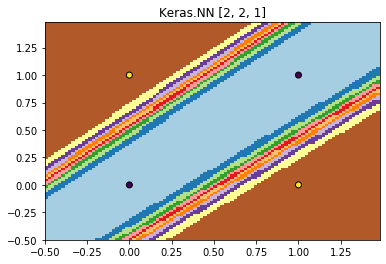

In [25]:
plot_results_with_hyperplane(inputs, labels, model, 'Keras.NN [2, 2, 1]');

#### Keras Scikit-Learn API

We can build scikit-learn compatible keras models as well, and we can use it in our pipeline just like any built-in model, including hyperparameter optimization. We can use it through wrapper classes: KerasClassifier for classification and KerasRegressor for regression.  
We have to define a build function, which setups the network and compiles it into a model, then pass it to the wrapper object.

In [27]:
from keras.wrappers.scikit_learn import KerasClassifier

In [26]:
def build(learning_rate=0.1, hidden_size=2, activation_function='sigmoid'):
    model = Sequential([
        Dense(hidden_size, input_dim=2),
        Activation(activation_function),
        Dense(1),
        Activation(activation_function),
    ])
    optimizer = SGD(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

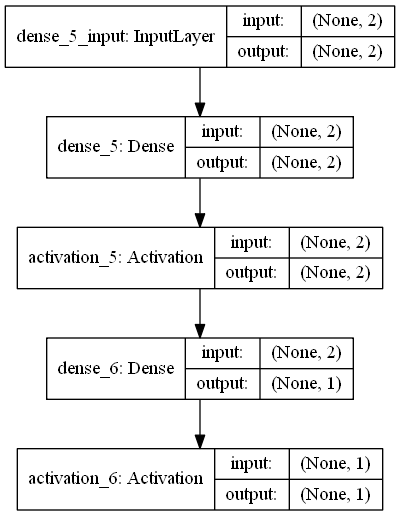

In [28]:
plot_model(build(), show_shapes=True, show_layer_names=True)

In [29]:
np.random.seed(42)
sklearn_model = KerasClassifier(build, batch_size=1, epochs=1500, verbose=0)

In [30]:
sklearn_model.fit(inputs, labels)

In [31]:
sklearn_model.predict(inputs)

array([[0],
       [1],
       [1],
       [0]])

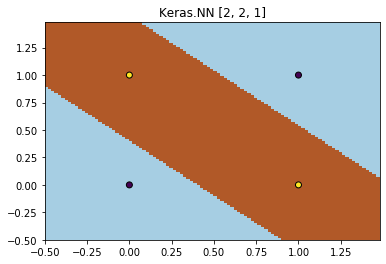

In [32]:
plot_results_with_hyperplane(inputs, labels, sklearn_model, 'Keras.NN [2, 2, 1]');

## Exercise

### Build a handwritten number detector - the MNIST dataset

<p><a href="https://commons.wikimedia.org/wiki/File:MnistExamples.png"><img src="pics/mnist.png"></a>
<br>By <a href="//commons.wikimedia.org/w/index.php?title=User:Jost_swd15&amp;action=edit&amp;redlink=1" class="new" title="User:Jost swd15 (page does not exist)">Josef Steppan</a> - <span class="int-own-work" lang="en">Own work</span>, <a href="https://creativecommons.org/licenses/by-sa/4.0" title="Creative Commons Attribution-Share Alike 4.0">CC BY-SA 4.0</a>, <a href="https://commons.wikimedia.org/w/index.php?curid=64810040">Link</a></p>

Let's build a classifier on the well known MNIST dataset. It contains 8x8 size pictures about handwritten numbers in grayscale. The goal is to predict which number the user written based on the pixel values.

The steps you have to complete are:
1. Load data and split into train-test set
2. Setup the network:
    - one hidden layer with 8 neurons
    - one output layer
3. Compile the network
4. Train data
5. Evaluate model

#### 1. Load data

We have already prepared this step for you. After loading the dataset with the built-in sklearn function split the dataset into a train and a test dataset. Use 1/4 of the data as test set.

In [33]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

0


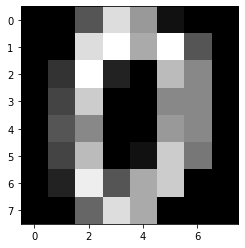

In [34]:
X, y = load_digits(return_X_y=True)

print(y[0])
plt.imshow(X[0].reshape(8, 8), cmap=plt.get_cmap('gray'))

In [37]:
# TODO: split the data into train and test dataset:
# - use 1/4 of the data as test set
# - set the seed to 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
assert X_train.shape == (1347, 64), "Incorrect split!"

#### 2. Setup network

We need a network with 1 hidden layer with 8 neurons.

Answer the following questions:
- What is the dimensionality of the input?
- What should be the output activation function?

In [54]:
# TODO: 
# - Initialize model
# - Create the hidden layer with 8 neurons and the proper input dimensionality
# - Create a ReLU activation function
# - Create the ouput layer
# - Select an appropriate activation function
input_dim = 8 * 8
output_dim = 10

mnist_model = Sequential()
mnist_model.add(Dense(8, input_dim=input_dim))
mnist_model.add(Activation('relu'))
mnist_model.add(Dense(output_dim))
mnist_model.add(Activation('softmax'))


#### 3. Model compilation

Initialize the optimizer, select the appropriate loss function and compile the model.

Answer the following questions:
- Which is the appropriate loss function considering the output activation function and the learning problem?
- Which optimizer would be ideal for this problem?

In [55]:
# TODO:
# - compile the model by selecting loss function and the optimizer

mnist_model.compile(
    optimizer=SGD(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

#### 4. Fit the model

Fit the model using an appropriate batch size and epoch.

Answer the following questions:
- What would be an ideal batch size?
- How many iterations should we use?

In [56]:
# TODO:
# - set the batch size to a reasonable size
# - set the epoch count to a reasonable number
# - fit the model

mnist_model.fit(X_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
1347/1347 [==============================] - 0s 43us/step - loss: 2.8039 - accuracy: 0.1745
Epoch 2/100
1347/1347 [==============================] - 0s 16us/step - loss: 2.2005 - accuracy: 0.1863
Epoch 3/100
1347/1347 [==============================] - 0s 16us/step - loss: 2.1081 - accuracy: 0.2309
Epoch 4/100
1347/1347 [==============================] - 0s 15us/step - loss: 1.9780 - accuracy: 0.2947
Epoch 5/100
1347/1347 [==============================] - 0s 16us/step - loss: 1.8752 - accuracy: 0.3259
Epoch 6/100
1347/1347 [==============================] - 0s 17us/step - loss: 1.7740 - accuracy: 0.3734
Epoch 7/100
1347/1347 [==============================] - 0s 15us/step - loss: 1.7211 - accuracy: 0.3994
Epoch 8/100
1347/1347 [==============================] - 0s 14us/step - loss: 1.6264 - accuracy: 0.4224
Epoch 9/100
1347/1347 [==============================] - 0s 15us/step - loss: 1.5643 - accuracy: 0.4506
Epoch 10/100
1347/1347 [==============================] - 0s 15u

1347/1347 [==============================] - 0s 15us/step - loss: 0.1980 - accuracy: 0.9399
Epoch 79/100
1347/1347 [==============================] - 0s 13us/step - loss: 0.2007 - accuracy: 0.9362
Epoch 80/100
1347/1347 [==============================] - 0s 15us/step - loss: 0.1987 - accuracy: 0.9391
Epoch 81/100
1347/1347 [==============================] - 0s 13us/step - loss: 0.2002 - accuracy: 0.9310
Epoch 82/100
1347/1347 [==============================] - 0s 13us/step - loss: 0.1954 - accuracy: 0.9369
Epoch 83/100
1347/1347 [==============================] - 0s 13us/step - loss: 0.1943 - accuracy: 0.9362
Epoch 84/100
1347/1347 [==============================] - 0s 13us/step - loss: 0.2081 - accuracy: 0.9332
Epoch 85/100
1347/1347 [==============================] - 0s 13us/step - loss: 0.1872 - accuracy: 0.9428
Epoch 86/100
1347/1347 [==============================] - 0s 18us/step - loss: 0.1859 - accuracy: 0.9391
Epoch 87/100
1347/1347 [==============================] - 0s 14us/st

#### 5. Evaluate model

Using the test set.

In [ ]:
final_loss, final_accuracy = model.evaluate(X_test, y_test)

print(f'The model final accuracy on test set is {final_accuracy:.2%}')

### Good job!

In the next chapter we'll discover how can we deal with high dimensional data (eg. images) when trying to learn their representation.